<a href="https://colab.research.google.com/github/JesseHenson/School/blob/main/Mod3_CT_opt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
# Made note of the unethical nature of the dataset, since this is educational I 
# continued.

'''
Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
'''
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


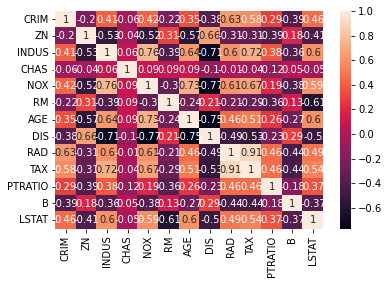

In [7]:
# Create a heatmap to view if there are any correlation - due to the nature of 
# linear regression, correlated columns may cause problems when fitting.
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
df['MEDV'] = boston_dataset.target

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


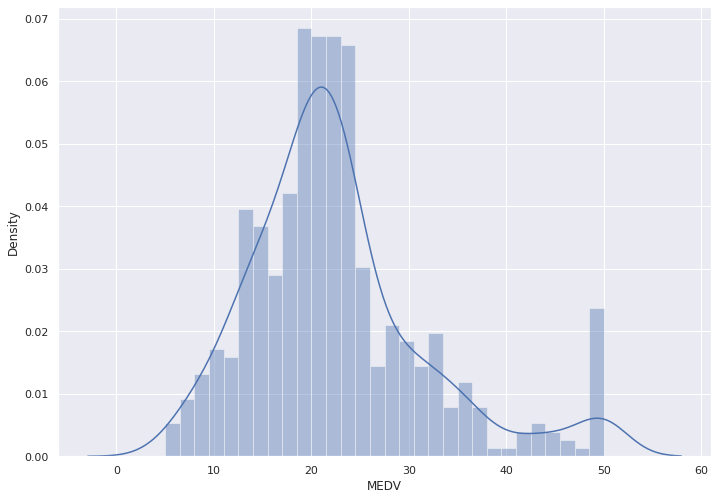

In [9]:
# Distribution of the median price of houses in 1000's 
# data shows a fairly normally distrited with a mean of around 20k

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [10]:
'''
1. Split dependent (target) and independent (feature) variables
2. Split test and training data for later evaluation of model 
3. Train model
4. Predict from model
5. Find RMSE and R2 
'''

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236517
R2 score is 0.7383393920590519


The model performance for testing set
--------------------------------------
RMSE is 4.5682920423032
R2 score is 0.7334492147453086


In [11]:
'''
- RMSE is almost within 1/2 a standerd deviation of MEDV.
- R2 is approx. .73 which indicates 73% of data is explained by the model.
'''

'\n- RMSE is almost within 1/2 a standerd deviation of MEDV.\n- R2 is approx. .73 which indicates 73% of data is explained by the model.\n'

In [12]:
# This code is used to drop correlated columns and determine if this process 
# helps or hinders RMSE

corr_matrix = correlation_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
df_non_corr = df.drop(to_drop, axis=1)
df_non_corr.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,65.2,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,6.421,78.9,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,7.185,61.1,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.998,45.8,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,7.147,54.2,3.0,18.7,396.90,5.33,36.2


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_corr_drop = df_non_corr.drop('MEDV', axis=1)
Y_corr_drop = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X_corr_drop, Y_corr_drop, test_size = 0.2, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.061335099958455
R2 score is 0.7017857187948404


The model performance for testing set
--------------------------------------
RMSE is 5.025273639438636
R2 score is 0.6774539875325443


In [14]:
'''
- RMSE is lower with correlated columns removed (anything over .7 correlation)
- R2 indicates less of the data is explained by model using dropped column method.
'''

'\n- RMSE is lower with correlated columns removed (anything over .7 correlation)\n- R2 indicates less of the data is explained by model using dropped column method.\n'

In [15]:
# std scaled data
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()


X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_std_scaled = stand_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_std_scaled, Y, test_size = 0.2, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
R2 score is 0.738339392059052


The model performance for testing set
--------------------------------------
RMSE is 4.568292042303212
R2 score is 0.7334492147453071


In [16]:
# minmax scaled data
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_min_scaled = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_min_scaled, Y, test_size = 0.2, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
R2 score is 0.738339392059052


The model performance for testing set
--------------------------------------
RMSE is 4.568292042303215
R2 score is 0.7334492147453068


In [17]:
'''
In either case scaling did not seem to help the model 
'''

'\nIn either case scaling did not seem to help the model \n'

In [25]:
from sklearn.linear_model import Ridge


X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

ridge = Ridge(alpha=1.9)
ridge.fit(X_train, Y_train)

y_train_predict = ridge.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.770993314173772
R2 score is 0.7350183075684615


The model performance for testing set
--------------------------------------
RMSE is 4.687411135792663
R2 score is 0.719367256727041


In [19]:
'''
Larger values specify stronger regularization
1/2c where c is alpha
I test several alpha numbers below and above the default of 1
Nothing improved the RMSE or R2 metrics
'''

'\nLarger values specify stronger regularization\n1/2c where c is alpha\n\n'

In [28]:
from sklearn import linear_model


X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

lasso = linear_model.Lasso(alpha=.1)
lasso.fit(X_train, Y_train)

y_train_predict = lasso.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lasso.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.836586699223647
R2 score is 0.7276820882262417


The model performance for testing set
--------------------------------------
RMSE is 4.838012425735203
R2 score is 0.7010447354446618


In [30]:
from sklearn.neighbors import KNeighborsRegressor

X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, Y_train)

y_train_predict = neigh.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = neigh.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.746442779535632
R2 score is 0.737738371910662


The model performance for testing set
--------------------------------------
RMSE is 5.719723143923773
R2 score is 0.5821482143553612


In [22]:
rmse_val = []

for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K, metric='euclidean')

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 6.900198917280516
RMSE value for k=  2 is: 6.246920810114623
RMSE value for k=  3 is: 6.313907255939171
RMSE value for k=  4 is: 5.719723143923773
RMSE value for k=  5 is: 5.925530339465116
RMSE value for k=  6 is: 5.854587795659111
RMSE value for k=  7 is: 5.9456468349974
RMSE value for k=  8 is: 6.12183116307659
RMSE value for k=  9 is: 6.297804541896349
RMSE value for k=  10 is: 6.310279273519035
RMSE value for k=  11 is: 6.400590499516842
RMSE value for k=  12 is: 6.466048206730655
RMSE value for k=  13 is: 6.399722219215355
RMSE value for k=  14 is: 6.413062017927031
RMSE value for k=  15 is: 6.590498376095385
RMSE value for k=  16 is: 6.660293666104372
RMSE value for k=  17 is: 6.701873131221773
RMSE value for k=  18 is: 6.71684943465057
RMSE value for k=  19 is: 6.740622669382674
RMSE value for k=  20 is: 6.7687652920182835


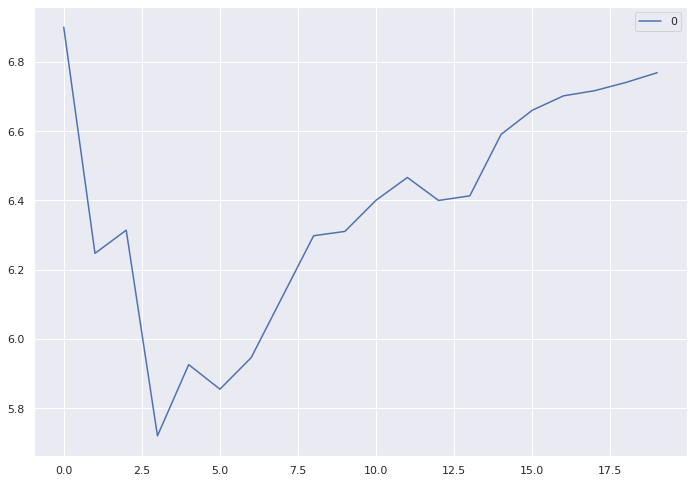

In [23]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [29]:
from sklearn.neighbors import KNeighborsRegressor

X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

neigh = KNeighborsRegressor(n_neighbors=4, metric='euclidean')
neigh.fit(X_train, Y_train)

y_train_predict = neigh.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = neigh.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.746442779535632
R2 score is 0.737738371910662


The model performance for testing set
--------------------------------------
RMSE is 5.719723143923773
R2 score is 0.5821482143553612


In [31]:
'''
This example prints all of the test datas predictions 
'''

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


X = df.drop('MEDV', axis=1)
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
print(y_train_predict)

[13.82876985 44.52852811  3.91599095 22.37795855 18.23592252 25.52374759
 29.43974677 18.69453347 27.85646296 24.64473374 20.53039645 32.24809769
 19.53384497 10.6751149  22.77616204 17.35106653 18.54046999 16.36847196
 21.72533915 35.71120541 21.83662056 19.76107221 24.18285088 25.5255809
 20.8464168  24.53500383 23.78138462 40.86911314 40.39520996 29.63686507
 12.619354   15.73341062 18.21178776 21.16340747 16.66802114  5.97334491
 24.31645777 30.41975812 23.26407764 19.39240148 16.09545573 21.11256921
 34.44869686 26.91553429 30.23074628 18.03371864 22.39969339 29.3639849
 13.012578   35.56341078 10.91286971 13.56179599 27.60611138 31.30757803
 11.07295389 24.39197327 28.74300261 32.45909463 15.73036294 30.13719482
  7.84896909 34.49967116 25.308736   20.0655545  15.24843367 12.43138278
 30.63133241 16.39957657 23.95719598 20.73701035 13.53764594 20.67956211
 13.42986345 20.74559128 22.33193767 34.06935771 22.4589955  16.80443725
 30.73371445 40.33660798 26.82012518 25.64492484 16.5